In [53]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [59]:
x = np.array(iris.iloc[:,[0,1,2,3]])

In [60]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
iris.shape
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [62]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [63]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

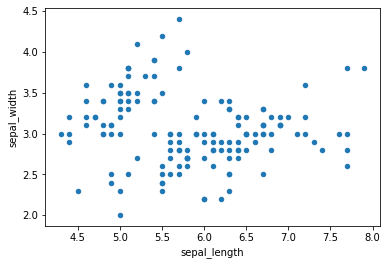

In [65]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

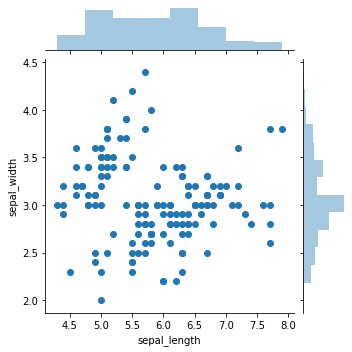

In [66]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

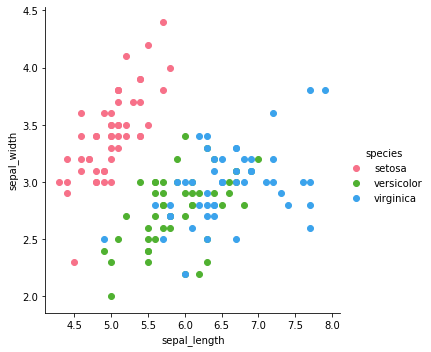

In [67]:
sns.FacetGrid(iris, hue="species", palette="husl", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

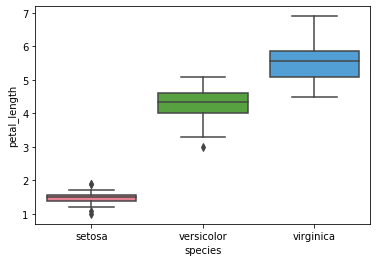

In [68]:
sns.boxplot(x="species", y="petal_length", palette="husl", data=iris)

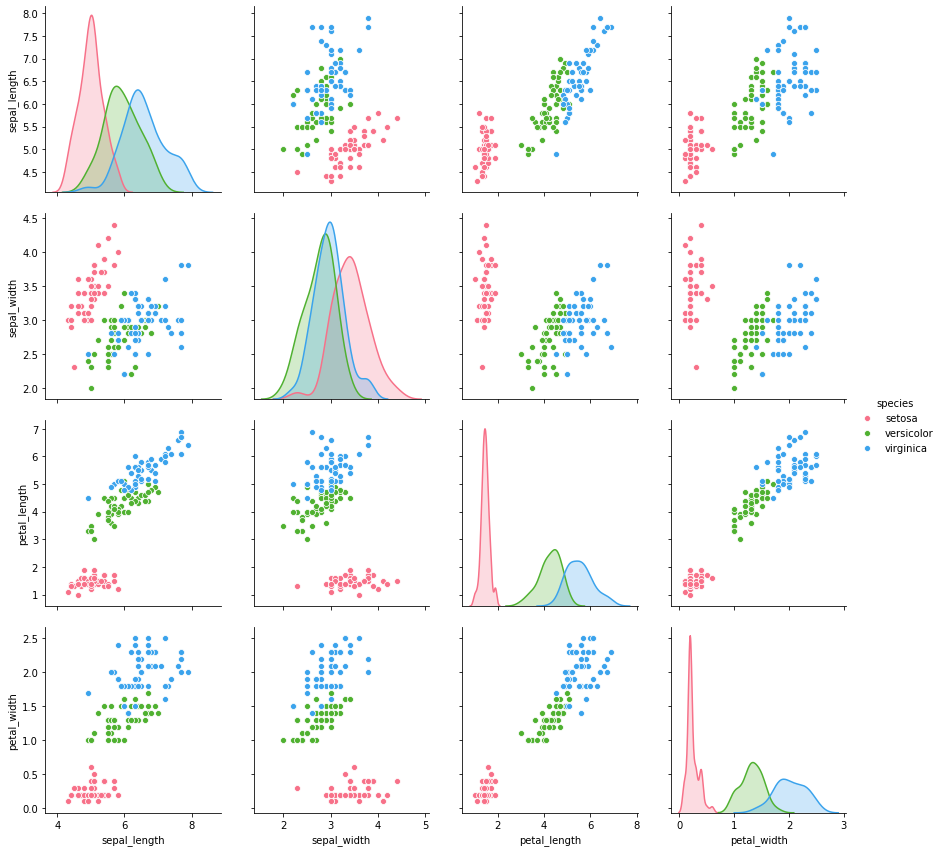

In [69]:
sns.pairplot(iris, hue="species", palette="husl", size=3)

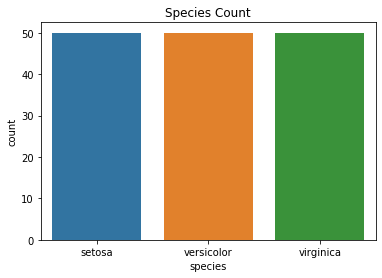

In [70]:
plt.title('Species Count')
sns.countplot(iris['species']);

In [71]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


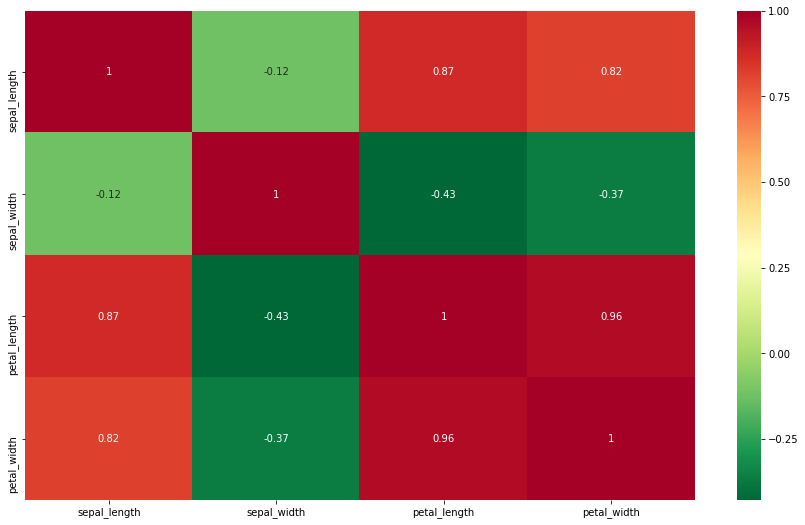

In [72]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris.corr(), cmap='RdYlGn_r', annot = True);

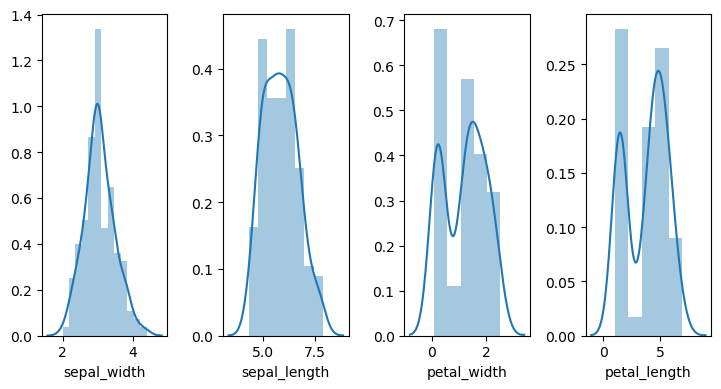

In [73]:
cols = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris[col])
    i = i+1
plt.tight_layout()
plt.show()

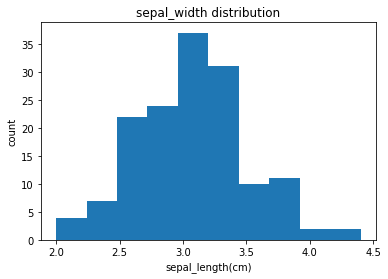

In [74]:

plt.hist(iris['sepal_width'])
plt.title('sepal_width distribution')
plt.ylabel('count')
plt.xlabel('sepal_length(cm)')
plt.show()

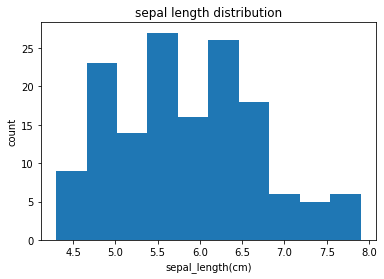

In [75]:
plt.hist(iris['sepal_length'])
plt.title('sepal length distribution')
plt.ylabel('count')
plt.xlabel('sepal_length(cm)')
plt.show()

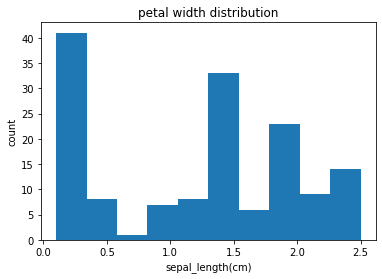

In [76]:
bins = [0,2.5,5.0,7.5,10]
plt.hist(iris['petal_width'])
plt.title('petal width distribution')
plt.ylabel('count')
plt.xlabel('sepal_length(cm)')
plt.show()

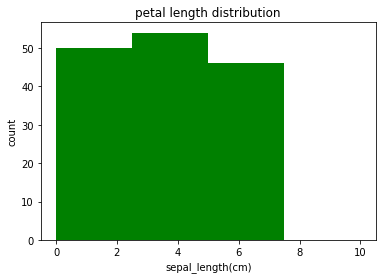

In [77]:
bins = [0,2.5,5.0,7.5,10]
plt.hist(iris['petal_length'],bins,histtype = 'bar',color='g')
plt.title('petal length distribution')
plt.ylabel('count')
plt.xlabel('sepal_length(cm)')
plt.show()

In [78]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__

In [79]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 0 4 4 4 0 4 0 0 4 0 4 0 4 4 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 3 4 1 3 3 1 0 1 3 1 3
 3 3 4 3 3 3 1 1 4 3 4 1 4 3 1 4 4 3 1 1 1 3 4 4 1 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]


array([[5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

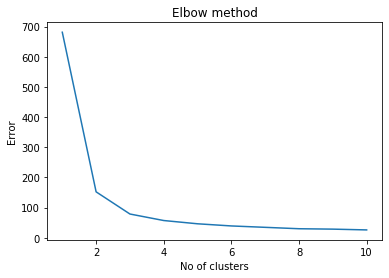

In [80]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [81]:
kmeans3 = KMeans(n_clusters = 3).fit(x)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


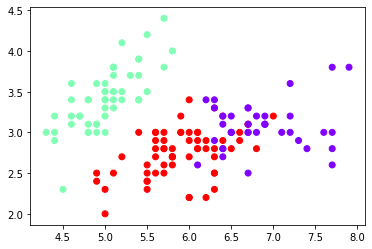

In [88]:


plt.scatter(x[:,0],x[:,1] ,c=y_kmeans3, cmap='rainbow')    
plt.show()

In [94]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': y_kmeans3, 'species': iris['species']})
 
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])
 
# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0           2         36
1            50           0          0
2             0          48         14
